# High order epistasis in hormone sensitivity (1)

Initial imports. Download the `epistasis` package [here](https://www.github.com/harmslab/epistasis)

In [1]:
# Import necessary science modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Reset some default parameters in matplotlib
import matplotlib as mpl
mpl.rcParams["font.family"] = "Arial"
mpl.rcParams["font.size"] = 10

# Linear epistasis model
from epistasis.models.linear import LinearEpistasisModel

# Nonlinear epitasis model
from epistasis.models.nonlinear import NonlinearEpistasisModel

## Linear epistasis model

The expectation baked into a linear epistasis model is that mutations have individual effects that sum together to give the phenotype. Epistasis, then, describes deviation from this additivity when multiple mutations are measured together. 

(<matplotlib.figure.Figure at 0x109f60ba8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x109f8d208>])

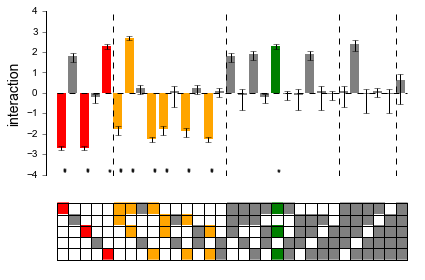

In [2]:
# Location of the data
in_path = "../../datasets/bridgham2.json"

# Fit epistasis with linear model. 
linear = LinearEpistasisModel.from_json(in_path)
linear.fit()
linear.fit_error()

linear.Plot.interactions(sigmas=1, log_space=True, height_ratio=2)

## Nonlinear epistasis model - saturation curve

We'll "expect" that as more mutations are introduced, their effect diminishes. Thus, the effect of a mutation depends on when it is introduced in the evolutionary trajectory. To capture this saturation, we fit with the following model:

$$
F(f(\vec{x})) = \frac{A \cdot f(\vec{x})}{B + f(\vec{x})}
$$

where $f(\vec{x})$ is the phenotype assuming linear epistasis. 

Fit with a nonlinear least squares regression. 

In [3]:
def saturation(x, saturation, rate):
    """ Saturation function where X is the linear epistasis model. """
    y = (saturation  * x / ( x + rate ))
    return y

R-squared of fit: 0.687355007701
saturation: -1.65612701699
rate: -56.440379123


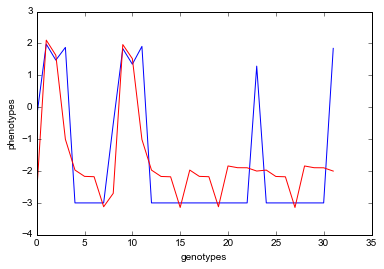

In [4]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=saturation)
nonlinear.fit_widget(saturation=(-1, 1, .1), rate=(-1,1, .1))

(<matplotlib.figure.Figure at 0x10a1a2cf8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10a37ae48>])

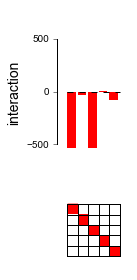

In [5]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)

(<matplotlib.figure.Figure at 0x10a44cdd8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a434c18>)

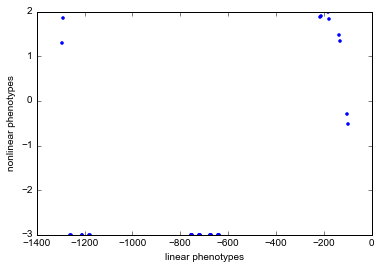

In [6]:
nonlinear.Plot.linear_phenotypes()

## Nonlinear epistasis model - Hill Model

In [7]:
def hill_equation(x, rate, hill):
    """ Saturation function where X is the linear epistasis model. """
    y = ( 1.0 / ((rate/x)**hill + 1))
    return y

R-squared of fit: nan
rate: -0.1
hill: 1.9


/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in power
  app.launch_new_instance()
/Users/Zsailer/virtual/py3/lib/python3.5/site-packages/scipy/optimize/minpack.py:601: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


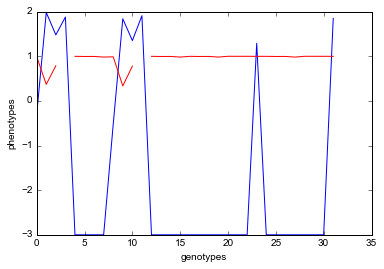

In [8]:
# Initialize a nonlinear LS regression, passing the function above.
nonlinear = NonlinearEpistasisModel.from_json(in_path, order=1, function=hill_equation)
nonlinear.fit_widget(rate=(-4, 4, .1), hill=(0, 4, .1))

(<matplotlib.figure.Figure at 0x10a471400>,
 <matplotlib.axes._subplots.AxesSubplot at 0x10a705550>)

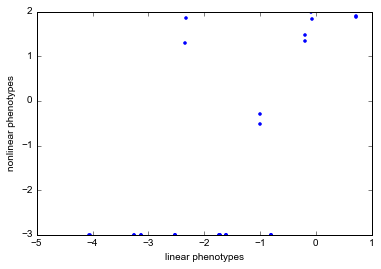

In [9]:
nonlinear.Plot.linear_phenotypes()

(<matplotlib.figure.Figure at 0x10b8083c8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x10b855ba8>])

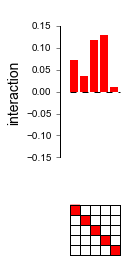

In [10]:
nonlinear.Plot.interactions(sigmas=0, figsize=(2,4), height_ratio=2, log_space=True)